In [4]:
import json
import csv
import tweepy
import re

In [5]:
#Creating a function
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #get the name of the spreadsheet we will write to
    fname = 'nadine.csv'

    #open the spreadsheet we will write to
    #write only
    with open(fname, 'w') as file:

        w = csv.writer(file)

        #write coloumn rows to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='compat').items(100):
            w.writerow([tweet.created_at, tweet.text.encode('utf-8'), tweet.user.screen_name.encode('utf-8'), tweet.user.followers_count])

In [6]:
#adding all the necessary keys
consumer_key = 'k0RpGuCKJuL04TXMQ0MVB7GON'  
consumer_secret = '5bRvds4rCUMpcHv9L8QpDcfc9SD0fkT0bOymx7iBMojQkiN8Mp'  
access_token = '1291331055702683648-CdzK0x4W4MGAyw91VzllAlLGv9SGDI'  
access_token_secret = 'NImfRcTEay6aADwShtTmsIA0hCyjIq3t1RvIQf3SWUW9k' 

#I want all tweets with this hashtag
hashtag_phrase = '#python'

#call function
if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

In [7]:
import pandas as pd
python_df = pd.read_json('C:/Users/nadin/Desktop/twitter3.json')
python_df.head(10)

,id,timestamp,tweet_text,username,followers_count
0,1,2020-08-06 17:41:57,b'I just entered to win a Colt Python Stainles...,b'packerfantimmy',1811
1,2,2020-08-06 17:41:47,b'I just entered to win a Colt Python Stainles...,b'stephen_moleski',270
2,3,2020-08-06 17:41:44,b'I just entered to win a Colt Python Stainles...,b'FisherGaberiel',0
3,4,2020-08-06 17:41:29,b'I just entered to win a Colt Python Stainles...,b'J_Rodriguez1317',302
4,5,2020-08-06 17:41:22,b'I just entered to win a Colt Python Stainles...,b'peacemaker0989',47
5,6,2020-08-06 17:41:15,b'I just entered to win a Colt Python Stainles...,b'Sswalker93',71
6,7,2020-08-06 17:41:06,b'I just entered to win a Colt Python Stainles...,b'RagnarDanesgold',5
7,8,2020-08-06 17:41:06,b'I just entered to win a Colt Python Stainles...,b'doomsday_daddy',22959
8,9,2020-08-06 17:41:05,b'I just entered to win a Colt Python Stainles...,b'Falconfarms',33
9,10,2020-08-06 17:40:59,b'I just entered to win a Colt Python Stainles...,b'Digitalcamotim',674


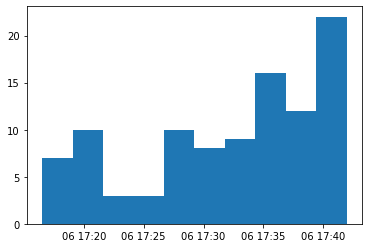

In [18]:
import matplotlib.pyplot as plt

plt.hist(python_df['timestamp'],bins=10)


plt.show()

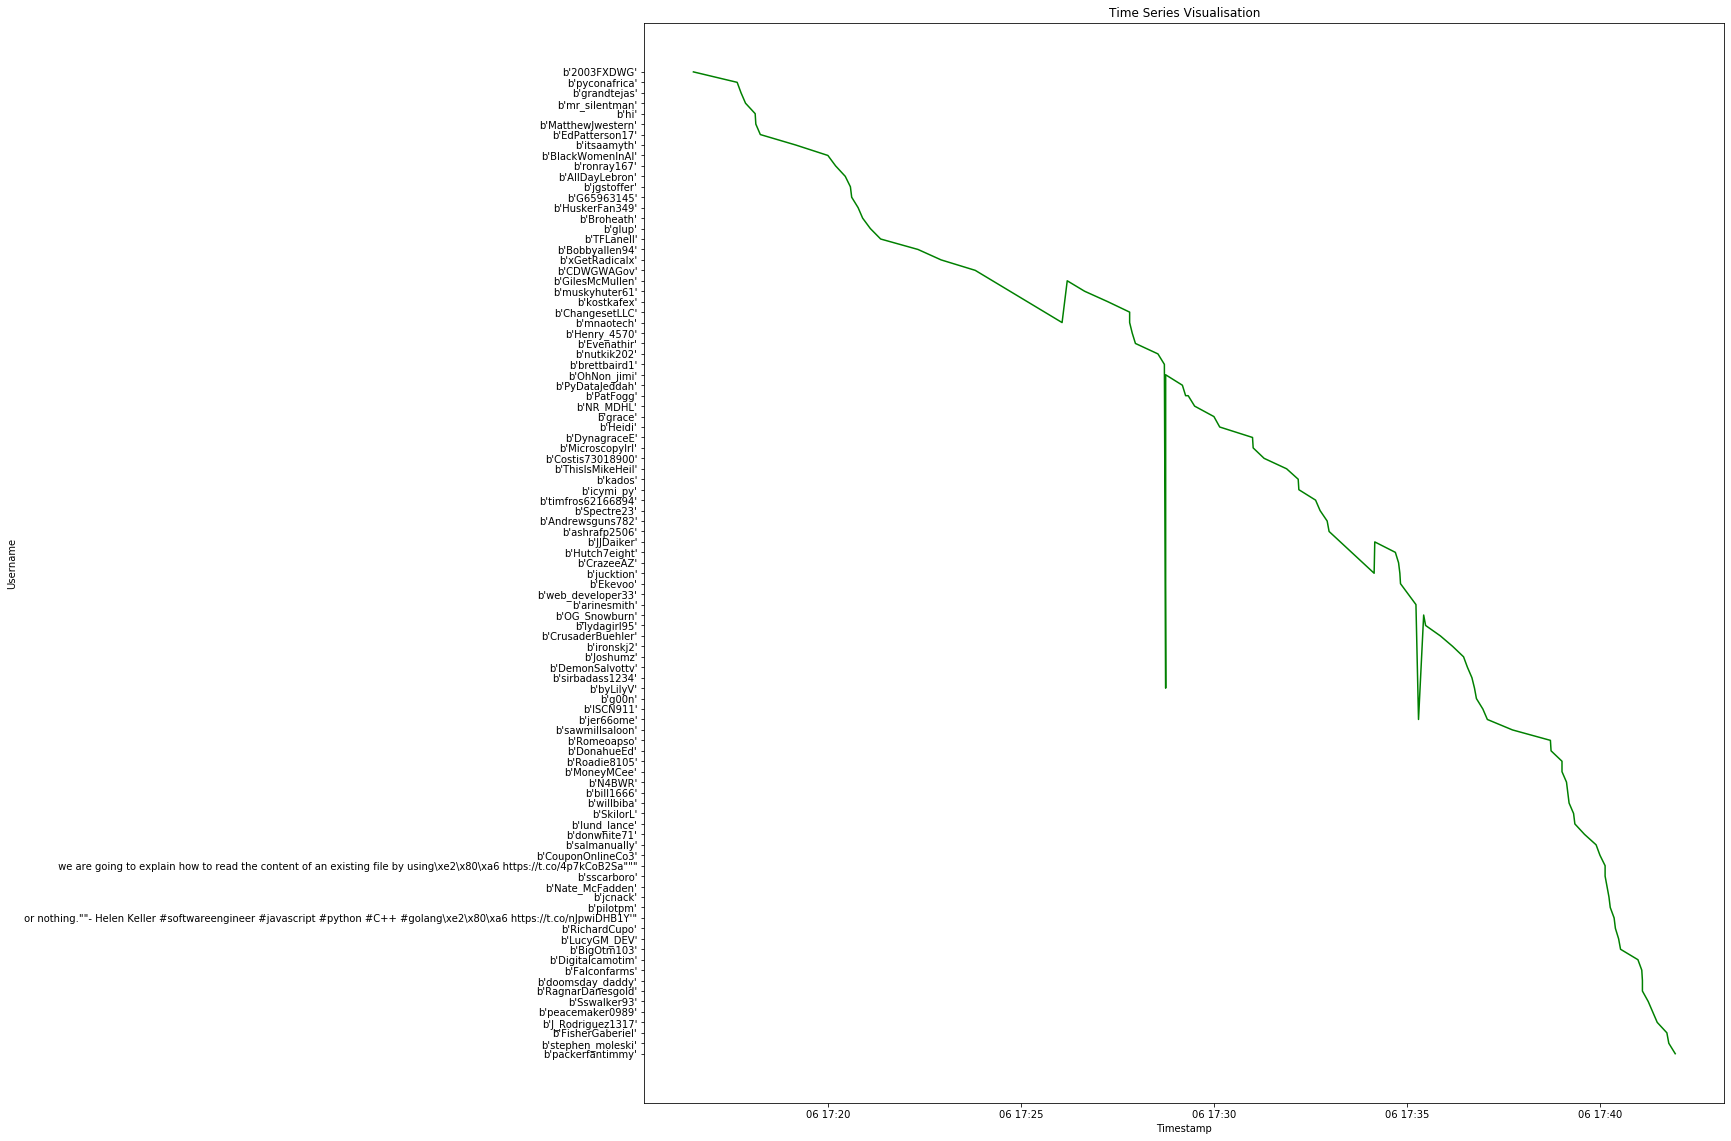

In [29]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,15))

ax1=fig.add_axes([0,0,1,1])

ax1.set_title('Time Series Visualisation')
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Username")

ax1.plot(python_df['timestamp'],python_df['username'],color='green')


plt.show()

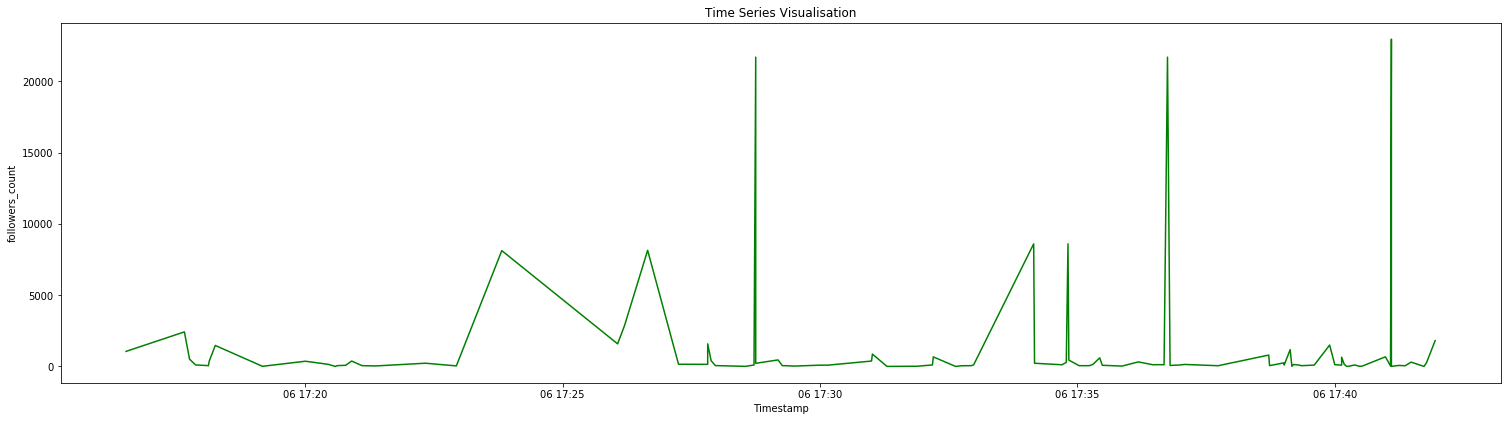

In [30]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,5))

ax1=fig.add_axes([0,0,1,1])

ax1.set_title('Time Series Visualisation')
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("followers_count")

ax1.plot(python_df['timestamp'],python_df['followers_count'],color='green')


plt.show()

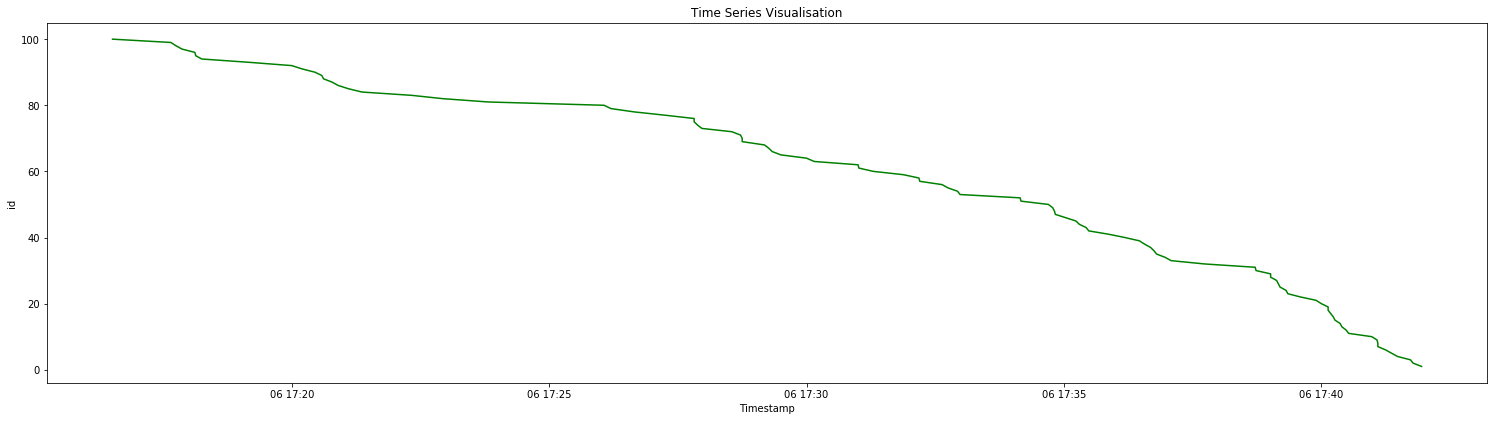

In [31]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,5))

ax1=fig.add_axes([0,0,1,1])

ax1.set_title('Time Series Visualisation')
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("id")

ax1.plot(python_df['timestamp'],python_df['id'],color='green')


plt.show()